In [14]:
import matplotlib.pyplot as plt
import numpy as np
import torch
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
import os
from pathlib import Path
import matplotlib.pyplot as plt




In [15]:
#NO LDA GIUSTO

feature_space = torch.load("/workspaces/dbm25/data/extracted_features.pt")

feature_type= "layer3"

k=5

#LDA HA BISOGNO DI ETICHETTE PER OGNI TIPO DI IMG NE CREO NUMERICHE 

label_img = {
    "brain_glioma": 0,
    "brain_menin": 1,
    "brain_tumor": 2
}

#Per ogni img
X = [] #aggiunge il vettore di feature
y = [] #assegna un'etichetta numerica in base alla cartella in cui si trova l'immagine
image_ids = []

"""
for element in feature_space:
    print(element.keys())
    break"""

#creazione x ed y
for element in feature_space:
    if feature_type in element:
        X.append(element[feature_type])
        path = element['file_path']
        img_id = os.path.basename(path)
        image_ids.append(img_id)

        parent_folder = Path(path).parts[-2]
        y.append(label_img[parent_folder])

#LDA massimizza la separazione tra classi in uno spazio con dimensione massima = (numero classi - 1)
#Al massimo usciranno due componenti latenti
lda = LinearDiscriminantAnalysis(n_components=min(len(np.unique(y))-1, k))
X_lda = lda.fit_transform(X, y)
top_k_semantics = X_lda.T[:k]


for i, semantic in enumerate(top_k_semantics):
    print(f"\nLatent Semantic {i + 1}:")
    
    image_weights = list(zip(image_ids, semantic))
    sorted_weights = sorted(image_weights, key=lambda x: abs(x[1]), reverse=True)
    
    for img_id, weight in sorted_weights:
        print(f"{img_id}\t{weight:.4f}")
    
    print("-" * 40)






Latent Semantic 1:
brain_tumor_0450.jpg	8.0557
brain_glioma_0268.jpg	-7.9481
brain_glioma_0275.jpg	-7.8573
brain_glioma_0864.jpg	-7.7926
brain_tumor_0610.jpg	7.7847
brain_tumor_0605.jpg	7.7640
brain_glioma_0346.jpg	-7.7341
brain_glioma_0200.jpg	-7.7209
brain_glioma_0145.jpg	-7.6684
brain_glioma_0340.jpg	-7.6190
brain_tumor_0100.jpg	7.5635
brain_glioma_0428.jpg	-7.5318
brain_tumor_0859.jpg	7.4644
brain_glioma_0293.jpg	-7.4503
brain_tumor_0969.jpg	7.4395
brain_glioma_0422.jpg	-7.4084
brain_glioma_0793.jpg	-7.4076
brain_glioma_0736.jpg	-7.4075
brain_glioma_0039.jpg	-7.3905
brain_tumor_0282.jpg	7.3696
brain_tumor_0991.jpg	7.3491
brain_glioma_0550.jpg	-7.3392
brain_tumor_0887.jpg	7.3327
brain_tumor_0267.jpg	7.3321
brain_glioma_0967.jpg	-7.3097
brain_tumor_0034.jpg	7.2880
brain_glioma_0082.jpg	-7.2589
brain_glioma_0373.jpg	-7.2546
brain_glioma_0748.jpg	-7.2507
brain_glioma_0177.jpg	-7.2503
brain_tumor_0863.jpg	7.2439
brain_glioma_0871.jpg	-7.2362
brain_glioma_0859.jpg	-7.2308
brain_glioma_0

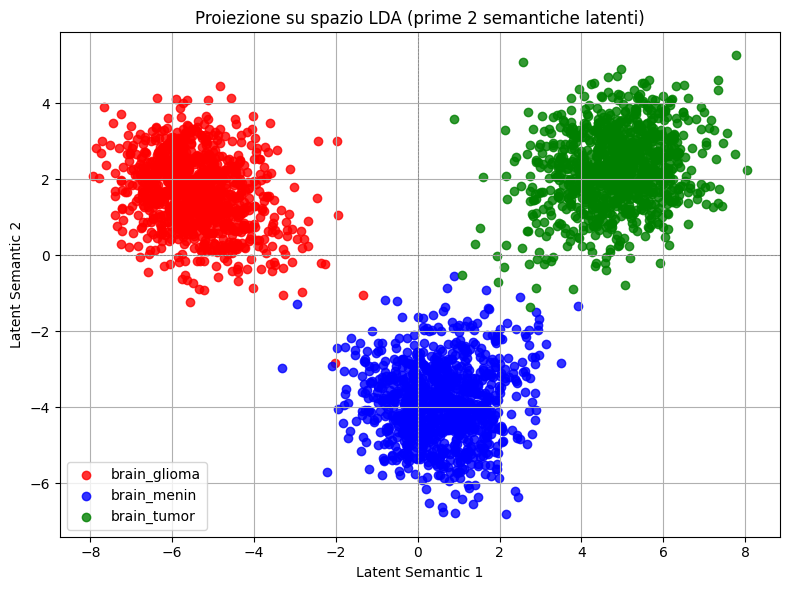

In [13]:

y_np = np.array(y)

colors = ['red', 'blue', 'green']
labels = ['brain_glioma', 'brain_menin', 'brain_tumor']

plt.figure(figsize=(8, 6))


for class_id in np.unique(y_np):
    idx = y_np == class_id
    plt.scatter(X_lda[idx, 0], 
                X_lda[idx, 1] if X_lda.shape[1] > 1 else np.zeros_like(X_lda[idx, 0]),
                label=labels[class_id], 
                color=colors[class_id], 
                alpha=0.8)

plt.axhline(0, color='gray', linestyle='--', linewidth=0.5)
plt.axvline(0, color='gray', linestyle='--', linewidth=0.5)
plt.title("Proiezione su spazio LDA (prime 2 semantiche latenti)")
plt.xlabel("Latent Semantic 1")
if X_lda.shape[1] > 1:
    plt.ylabel("Latent Semantic 2")
else:
    plt.ylabel("")

plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()
